# Proyecto 1 
 Juan Camilo Gómez-202220238
 
 Jerónimo Rueda-202223775

### Librerias


In [129]:
   
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns  

## Datos

In [130]:
df = pd.read_csv("Saber 11 Datos Valle.csv")


mapaarreglo = {
    "Sin Estrato": 0,
    "Estrato 1": 1,
    "Estrato 2": 2,
    "Estrato 3": 3,
    "Estrato 4": 4,
    "Estrato 5": 5,
    "Estrato 6": 6
}

df["estrato_num"] = df["fami_estratovivienda"].map(mapaarreglo)


#df[df["fami_estratovivienda"]=="Sin Estrato"][["estrato_num", "fami_estratovivienda"]].head()

df.head()


,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,...,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,estrato_num
0,20224,TI,SB11202240052447,URBANO,NaN,A,NaN,1.760018e+11,1.760018e+11,76,...,Si,Si,A1,54.0,48.0,33.0,43.0,48.0,219.0,1.0
1,20224,TI,SB11202240057782,URBANO,N,A,TÉCNICO/ACADÉMICO,1.761110e+11,1.761110e+11,76,...,NaN,No,A-,44.0,52.0,37.0,37.0,42.0,211.0,NaN
2,20224,TI,SB11202240151458,URBANO,N,A,TÉCNICO/ACADÉMICO,1.763640e+11,1.763640e+11,76,...,Si,Si,A2,64.0,54.0,49.0,54.0,54.0,268.0,2.0
3,20224,TI,SB11202240225511,URBANO,NaN,A,ACADÉMICO,1.766060e+11,1.766060e+11,76,...,NaN,NaN,A-,46.0,43.0,54.0,49.0,56.0,251.0,NaN
4,20224,TI,SB11202240427250,URBANO,N,A,ACADÉMICO,3.760010e+11,3.760010e+11,76,...,Si,No,A-,39.0,19.0,42.0,38.0,45.0,181.0,4.0


### Atributos

In [131]:
df.shape
print(df["estrato_num"].value_counts())
print(df["fami_estratovivienda"].value_counts())

estrato_num
2.0    231928
1.0    177143
3.0    142635
4.0     34072
5.0     20703
6.0      8791
0.0      4283
Name: count, dtype: int64
fami_estratovivienda
Estrato 2      231928
Estrato 1      177143
Estrato 3      142635
Estrato 4       34072
Estrato 5       20703
Estrato 6        8791
Sin Estrato      4283
Name: count, dtype: int64


# Descripción Breve Estadística

In [132]:
df.describe()
df["periodo"].value_counts()
df["año"]=df["periodo"].astype(str).str[:4]
#df["año"].value_counts().sort_index()

In [133]:
df[["punt_ingles","punt_matematicas",
                                      "punt_sociales_ciudadanas","punt_c_naturales",
                                      "punt_lectura_critica","punt_global"]].describe(percentiles=[0.5, 0.75, 0.90, 0.98])

,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,642478.000000,642592.000000,387831.000000,387831.000000,387831.00000,387831.000000
mean,49.081174,49.139234,49.525677,50.481117,52.96090,254.682014
std,12.488860,11.797552,11.774947,10.738144,10.31491,50.461819
min,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,47.000000,49.000000,49.000000,50.000000,53.00000,252.000000
75%,55.000000,57.000000,58.000000,58.000000,60.00000,289.000000
90%,66.000000,64.000000,65.000000,65.000000,66.00000,323.000000
98%,82.000000,75.000000,74.000000,73.000000,74.00000,364.000000
max,117.290000,127.000000,100.000000,100.000000,100.00000,495.000000


# Covarianza


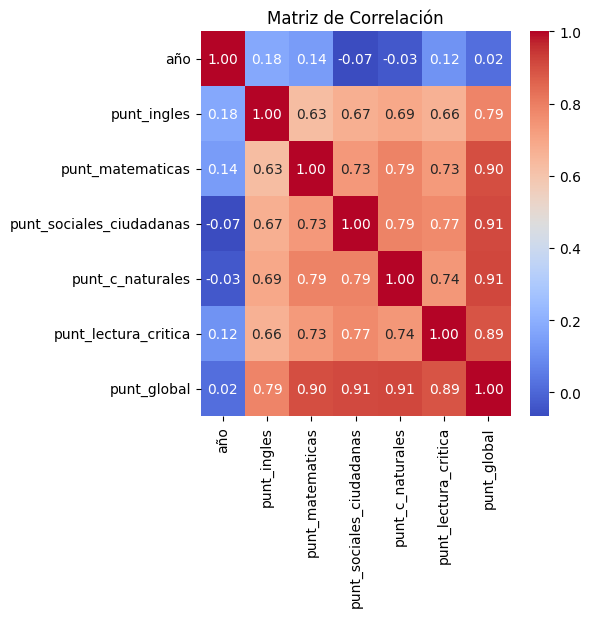

In [134]:
numericas=df[["año","punt_ingles","punt_matematicas","punt_sociales_ciudadanas","punt_c_naturales","punt_lectura_critica","punt_global"]]
plt.figure(figsize=(5,5))
sns.heatmap(numericas.corr(), cmap="coolwarm", annot=True, fmt=".2f")

plt.title("Matriz de Correlación")
plt.show()



### Darle Puntajes a variables


In [135]:
puntajes=df.copy()


puntajes["Puntaje area ubicacion"] = puntajes["cole_area_ubicacion"].map({"URBANO": 1, "RURAL": 0})
puntajes["Puntaje bilinguen"] = puntajes["cole_bilingue"].map({"S": 1, "N": 0})
puntajes["Puntaje calendario"] = puntajes["cole_calendario"].map({"A": 1, "B": 2,"OTROS": 3})
puntajes["Puntaje caracter"] = puntajes["cole_caracter"].map({"TÉCNICO/ACADÉMICO": 1, "ACADÉMICO": 2,"TÉCNICO": 3,"NO APLICA": 4})
puntajes["Puntaje Genero col"] = puntajes["cole_genero"].map({"MIXTO": 1, "FEMENINO": 2,"MASCULINO": 3})
puntajes["Puntaje Jornada"] = puntajes["cole_jornada"].map({"MAÑANA": 1, "TARDE": 2,"COMPLETA": 3,"NOCHE": 4,"UNICA": 5,"SABATINA":6})
puntajes["Puntaje Naturaleza"] = puntajes["cole_naturaleza"].map({"OFICIAL": 1, "NO OFICIAL": 0})
puntajes["Puntaje Sede Principal"] = puntajes["cole_sede_principal"].map({"S": 1, "N": 0})
puntajes["Puntaje Investigación"] = puntajes["estu_estadoinvestigacion"].map({"PUBLICAR": 3, "VALIDEZ OFICINA JURÍDICA": 2,"PRESENTE CON LECTURA TARDIA":1,"NO SE COMPROBO IDENTIDAD DEL EXAMINADO":0})
puntajes["Puntaje Genero"] = puntajes["estu_genero"].map({"M": 0, "F": 1})
puntajes["Puntaje Libertad"] = puntajes["estu_privado_libertad"].map({"S": 0, "N": 1})
puntajes["Puntaje Cuartos Hogar"] = puntajes["fami_cuartoshogar"].map({"Uno": 1, "Dos": 2,"Tres": 3,"Cuatro": 4,"Cinco": 5,"Seis":6,"Seis o mas": 6.5,"Siete": 7,"Ocho": 8,"Nueve": 9,"Diez o más": 10})

puntajes["Puntaje Educación Madre"] = puntajes["fami_educacionmadre"].map({"No Aplica":0,"No sabe":1,"Ninguno":2,"Primaria incompleta":3,
                                                                           "Primaria completa":4,"Secundaria (Bachillerato) incompleta":5,
                                                                           "Secundaria (Bachillerato) completa":6,"Técnica o tecnológica completa":7,
                                                                           "Técnica o tecnológica incompleta":8,"Educación profesional incompleta":9,
                                                                           "Educación profesional completa":10,"Postgrado":11})

puntajes["Puntaje Educación Padre"] = puntajes["fami_educacionpadre"].map({"No Aplica":0,"No sabe":1,"Ninguno":2,"Primaria incompleta":3,
                                                                           "Primaria completa":4,"Secundaria (Bachillerato) incompleta":5,
                                                                           "Secundaria (Bachillerato) completa":6,"Técnica o tecnológica completa":7,
                                                                           "Técnica o tecnológica incompleta":8,"Educación profesional incompleta":9,
                                                                           "Educación profesional completa":10,"Postgrado":11})

puntajes["Puntaje Personas Hogar"] = puntajes["fami_personashogar"].map({"Una": 1, "1 a 2":1.5,"Dos": 2,"Tres": 3,"3 a 4":3.5,"Cuatro": 4,"Cinco": 5,
                                                                         "5 a 6":5.5,"Seis": 6,"Siete": 7,"7 a 8":7.5,"Ocho": 8,"Nueve": 9,"9 o más":9.5,
                                                                         "Diez": 10,"Doce o más": 10})
puntajes["Puntaje Automóvil"] = puntajes["fami_tieneautomovil"].map({"Si": 1, "No": 0})
puntajes["Puntaje Computador"] = puntajes["fami_tienecomputador"].map({"Si": 1, "No": 0})

puntajes["Puntaje Lavadora"] = puntajes["fami_tienelavadora"].map({"Si": 1, "No": 0})
puntajes["Puntaje Desempeño ingles"] = puntajes["desemp_ingles"].map({"A-":0,"A1": 1, "A2": 2,"B1": 3,"B+": 4})


puntajes["desemp_ingles"].value_counts()


puntajess = puntajes.iloc[:, 45:].copy()
puntajess.head()
#puntajess.info()


puntajess.corr(numeric_only=True)

"""
sns.heatmap(puntajess.corr(numeric_only=True), cmap="coolwarm")
puntajess.corr(numeric_only=True)["punt_global"].sort_values(ascending=False)

"""

puntajess[puntajess["Puntaje Automóvil"]==1][["Puntaje Automóvil","punt_global"]].describe()


,Puntaje Automóvil,punt_global
count,155543.0,99138.000000
mean,1.0,275.837943
std,0.0,54.786471
min,1.0,0.000000
25%,1.0,236.000000
50%,1.0,275.000000
75%,1.0,315.000000
max,1.0,495.000000


Index(['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
       'punt_c_naturales', 'punt_lectura_critica', 'punt_global',
       'estrato_num', 'año', 'Puntaje area ubicacion', 'Puntaje bilinguen',
       'Puntaje calendario', 'Puntaje caracter', 'Puntaje Genero col',
       'Puntaje Jornada', 'Puntaje Naturaleza', 'Puntaje Sede Principal',
       'Puntaje Investigación', 'Puntaje Genero', 'Puntaje Libertad',
       'Puntaje Cuartos Hogar', 'Puntaje Educación Madre',
       'Puntaje Educación Padre', 'Puntaje Personas Hogar',
       'Puntaje Automóvil', 'Puntaje Computador', 'Puntaje Lavadora',
       'Puntaje Desempeño ingles', 'Puntaje educacion padres',
       'Puntaje recursos hogar'],
      dtype='object')

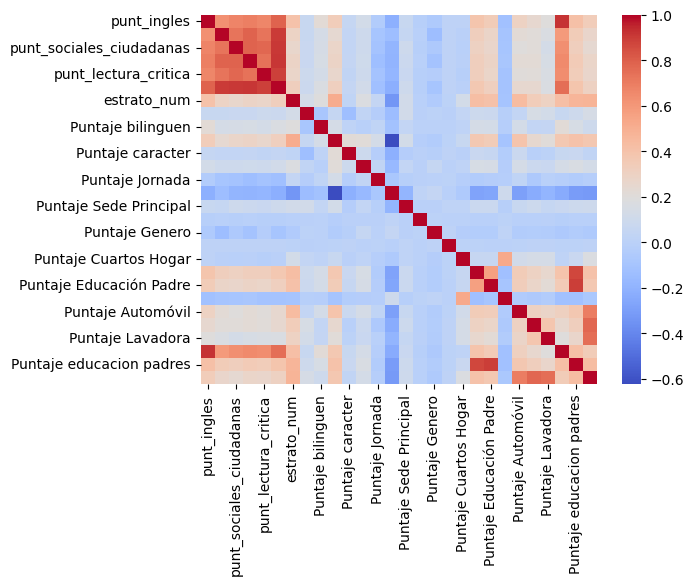

In [136]:
combinado= puntajess.copy()

combinado["Puntaje educacion padres"] = combinado["Puntaje Educación Padre"]+combinado["Puntaje Educación Madre"]
combinado["Puntaje recursos hogar"] = combinado["Puntaje Automóvil"]+combinado["Puntaje Computador"]+combinado["Puntaje Lavadora"]
#puntajes["Puntaje jornada y caracter"] = puntajes["Puntaje Jornada"]+puntajes["Puntaje caracter"]
#puntajes["Puntaje area y naturaleza"] = puntajes["Puntaje area ubicacion"]+puntajes["Puntaje Naturaleza"]


combinado.corr(numeric_only=True)

sns.heatmap(combinado.corr(numeric_only=True), cmap="coolwarm")
combinado.corr(numeric_only=True)["punt_global"].sort_values(ascending=False)



combinado[combinado["Puntaje recursos hogar"]==0][["Puntaje recursos hogar","punt_global"]].describe()
#combinado[combinado["Puntaje recursos hogar"]==1][["Puntaje recursos hogar","punt_global"]].describe()
#combinado[combinado["Puntaje recursos hogar"]==2][["Puntaje recursos hogar","punt_global"]].describe()
#combinado[combinado["Puntaje recursos hogar"]==3][["Puntaje recursos hogar","punt_global"]].describe()

combinado.columns

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642592 entries, 0 to 642591
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   periodo                        642592 non-null  int64  
 1   estu_tipodocumento             642592 non-null  object 
 2   estu_consecutivo               642592 non-null  object 
 3   cole_area_ubicacion            642262 non-null  object 
 4   cole_bilingue                  577678 non-null  object 
 5   cole_calendario                642506 non-null  object 
 6   cole_caracter                  633985 non-null  object 
 7   cole_cod_dane_establecimiento  642018 non-null  float64
 8   cole_cod_dane_sede             642505 non-null  float64
 9   cole_cod_depto_ubicacion       642592 non-null  int64  
 10  cole_cod_mcpio_ubicacion       642592 non-null  int64  
 11  cole_codigo_icfes              640838 non-null  float64
 12  cole_depto_ubicacion          

## Faltantes

In [138]:
df.isna().sum()

periodo                               0
estu_tipodocumento                    0
estu_consecutivo                      0
cole_area_ubicacion                 330
cole_bilingue                     64914
cole_calendario                      86
cole_caracter                      8607
cole_cod_dane_establecimiento       574
cole_cod_dane_sede                   87
cole_cod_depto_ubicacion              0
cole_cod_mcpio_ubicacion              0
cole_codigo_icfes                  1754
cole_depto_ubicacion                  0
cole_genero                           0
cole_jornada                          0
cole_mcpio_ubicacion                  0
cole_naturaleza                       0
cole_nombre_establecimiento           0
cole_nombre_sede                      0
cole_sede_principal                   0
estu_cod_depto_presentacion          28
estu_cod_mcpio_presentacion          28
estu_cod_reside_depto              4273
estu_cod_reside_mcpio              4273
estu_depto_presentacion              28


## Columnas y Ejemplo

In [139]:
columnas=df.columns
for i in columnas:
    print(f"Columna:{i} , Ejemplo: {df[i][2]}")


Columna:periodo , Ejemplo: 20224
Columna:estu_tipodocumento , Ejemplo: TI
Columna:estu_consecutivo , Ejemplo: SB11202240151458
Columna:cole_area_ubicacion , Ejemplo: URBANO
Columna:cole_bilingue , Ejemplo: N
Columna:cole_calendario , Ejemplo: A
Columna:cole_caracter , Ejemplo: TÉCNICO/ACADÉMICO
Columna:cole_cod_dane_establecimiento , Ejemplo: 176364001313.0
Columna:cole_cod_dane_sede , Ejemplo: 176364001313.0
Columna:cole_cod_depto_ubicacion , Ejemplo: 76
Columna:cole_cod_mcpio_ubicacion , Ejemplo: 76364
Columna:cole_codigo_icfes , Ejemplo: 671156.0
Columna:cole_depto_ubicacion , Ejemplo: VALLE
Columna:cole_genero , Ejemplo: MIXTO
Columna:cole_jornada , Ejemplo: UNICA
Columna:cole_mcpio_ubicacion , Ejemplo: JAMUNDÍ
Columna:cole_naturaleza , Ejemplo: OFICIAL
Columna:cole_nombre_establecimiento , Ejemplo: INSTITUCION EDUCATIVA TÉCNICA INDUSTRIAL ESPAÑA
Columna:cole_nombre_sede , Ejemplo: TÉCNICA INDUSTRIAL ESPAÑA-SEDE PRINCIPAL
Columna:cole_sede_principal , Ejemplo: S
Columna:estu_cod_de

## Por municipios

In [140]:
municipios= df[["año","cole_mcpio_ubicacion","punt_ingles","punt_matematicas",
                                      "punt_sociales_ciudadanas","punt_c_naturales",
                                      "punt_lectura_critica","punt_global"]]

def normalizar(s):
    return (s.str.normalize("NFKD")
                .str.encode("ascii","ignore")
                .str.decode("utf-8").str.upper()
                .str.strip())





municipios["cole_mcpio_ubicacion"] = (
    df["cole_mcpio_ubicacion"]
    .pipe(normalizar))
municipios["cole_mcpio_ubicacion"] = municipios["cole_mcpio_ubicacion"].replace(["CALIMA (DARIEN)", "CALIMA"], "CALIMA EL DARIEN")

mapazonas= {
    # Zona Pacífico 
    "BUENAVENTURA": "Pacífico",

    # Zona Centro
    "CALIMA EL DARIEN": "Centro",
    "YOTOCO": "Centro",
    "SAN PEDRO": "Centro",
    "GUADALAJARA DE BUGA": "Centro",   
    "BUGA": "Centro",                  
    "GUACARI": "Centro",
    "GINEBRA": "Centro",
    "EL CERRITO": "Centro",

    # Zona Sur 
    "DAGUA": "Sur",
    "LA CUMBRE": "Sur",
    "VIJES": "Sur",
    "YUMBO": "Sur",
    "CALI": "Sur",
    "PALMIRA": "Sur",
    "CANDELARIA": "Sur",
    "PRADERA": "Sur",
    "FLORIDA": "Sur",
    "JAMUNDI": "Sur",
    "RESTREPO": "Sur",

    # Zona Norte
    "ALCALA": "Norte",
    "ULLOA": "Norte",
    "CARTAGO": "Norte",
    "ANSERMANUEVO": "Norte",
    "EL AGUILA": "Norte",
    "EL CAIRO": "Norte",
    "VERSALLES": "Norte",
    "ARGELIA": "Norte",
    "TORO": "Norte",
    "OBANDO": "Norte",
    "LA VICTORIA": "Norte",
    "LA UNION": "Norte",
    "ROLDANILLO": "Norte",
    "ZARZAL": "Norte",
    "BOLIVAR": "Norte",
    "TRUJILLO": "Norte",
    "RIOFRIO": "Norte",
    "EL DOVIO": "Norte",
    "ANDALUCIA": "Norte",
    "BUGALAGRANDE": "Norte",
    "TULUA": "Norte",
    "SEVILLA": "Norte",
    "CAICEDONIA": "Norte",
}

municipios["Zona"] = municipios["cole_mcpio_ubicacion"].map(mapazonas)
#print(municipios.groupby("Zona").size())
#municipios[municipios["Zona"].isna()]
municipios.head()

municipios["año"].astype(int)

C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\3745268951.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipios["cole_mcpio_ubicacion"] = (
C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\3745268951.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipios["cole_mcpio_ubicacion"] = municipios["cole_mcpio_ubicacion"].replace(["CALIMA (DARIEN)", "CALIMA"], "CALIMA EL DARIEN")
C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\3745268951.py:73: SettingWit

0         2022
1         2022
2         2022
3         2022
4         2022
          ... 
642587    2015
642588    2014
642589    2020
642590    2014
642591    2011
Name: año, Length: 642592, dtype: int64

In [141]:
munizonas=municipios.groupby("Zona")[["punt_ingles","punt_matematicas",
                                      "punt_sociales_ciudadanas","punt_c_naturales",
                                      "punt_lectura_critica","punt_global"]].describe(percentiles=[0.5, 0.75, 0.90, 0.95])

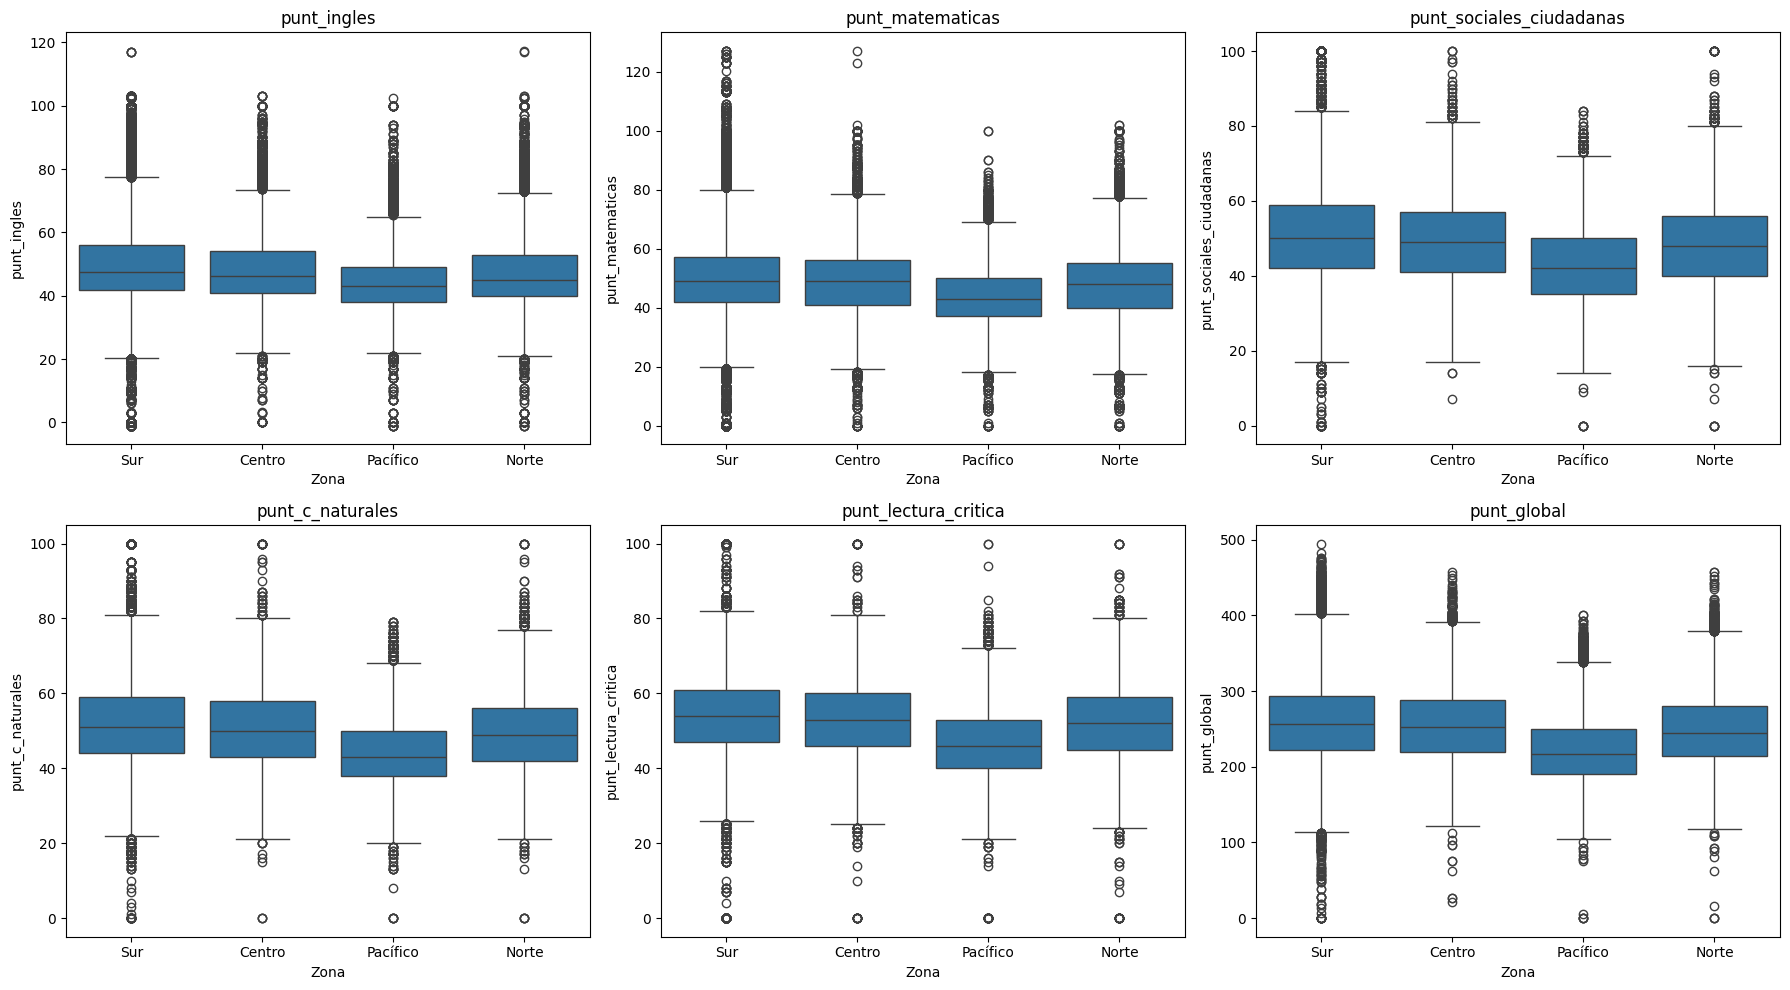

In [142]:
#sns.violinplot(data=municipios, x="Zona", y="punt_matematicas",color="lightblue")
#sns.violinplot(data=municipios, x="Zona", y="punt_global",color="violet")
categorias = ["punt_ingles","punt_matematicas","punt_sociales_ciudadanas","punt_c_naturales","punt_lectura_critica","punt_global"]
fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()


for i, cat in enumerate(categorias):
    #print(i,cat)
    sns.boxplot(
        data=municipios,
        x="Zona",
        y=cat,
        ax=axes[i],
        
    )
    axes[i].set_title(cat)

plt.tight_layout()
plt.show()

## Índices de Violencia

In [143]:
indicesviolencia = pd.read_excel("Violencia Valle del Cauca Indices con Página con todo junto.xlsx", sheet_name="Indices")
indicesviolencia.head()
#indicesviolencia=indicesviolencia.rename(columns={"Unnamed: 0": "cole_mcpio_ubicacion"})

#indicesviolencia.describe()

#columnas= [c for c in indicesviolencia.columns if c.startswith("Indice")]
#print(columnas)
print(indicesviolencia.columns.tolist())
 


['cole_mcpio_ubicacion', 2020, 2021, 2022, 2023, 2024]


In [144]:
municipos2020s=municipios[municipios["año"].astype(int)>=2020]

#municipios.info()




#x=municipos2020s.groupby(["cole_mcpio_ubicacion","año"],as_index=False)
#x.head()
municipos2020s.shape



(99508, 9)

In [ ]:
indice_largo = indicesviolencia.melt(
    id_vars="cole_mcpio_ubicacion",
    value_vars=[2020, 2021, 2022, 2023, 2024],
    var_name="año",
    value_name="indice_violencia"
)
indice_largo["año"] = indice_largo["año"].astype(int)
municipos2020s["año"] = municipos2020s["año"].astype(int)

muni_vio = municipos2020s.merge(
    indice_largo,
    on=["cole_mcpio_ubicacion", "año"],
    how="left"
)

#print(muni_vio)
#muni_vio.shape
munivio=muni_vio.groupby(["cole_mcpio_ubicacion"])
munivio.describe()

print(muni_vio.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))

C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\3772002791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipos2020s["año"] = municipos2020s["año"].astype(int)


indice_violencia            1.000000
punt_ingles                 0.175149
punt_global                 0.159274
punt_lectura_critica        0.152710
punt_c_naturales            0.141931
punt_sociales_ciudadanas    0.140294
punt_matematicas            0.130742
año                        -0.050073
Name: indice_violencia, dtype: float64


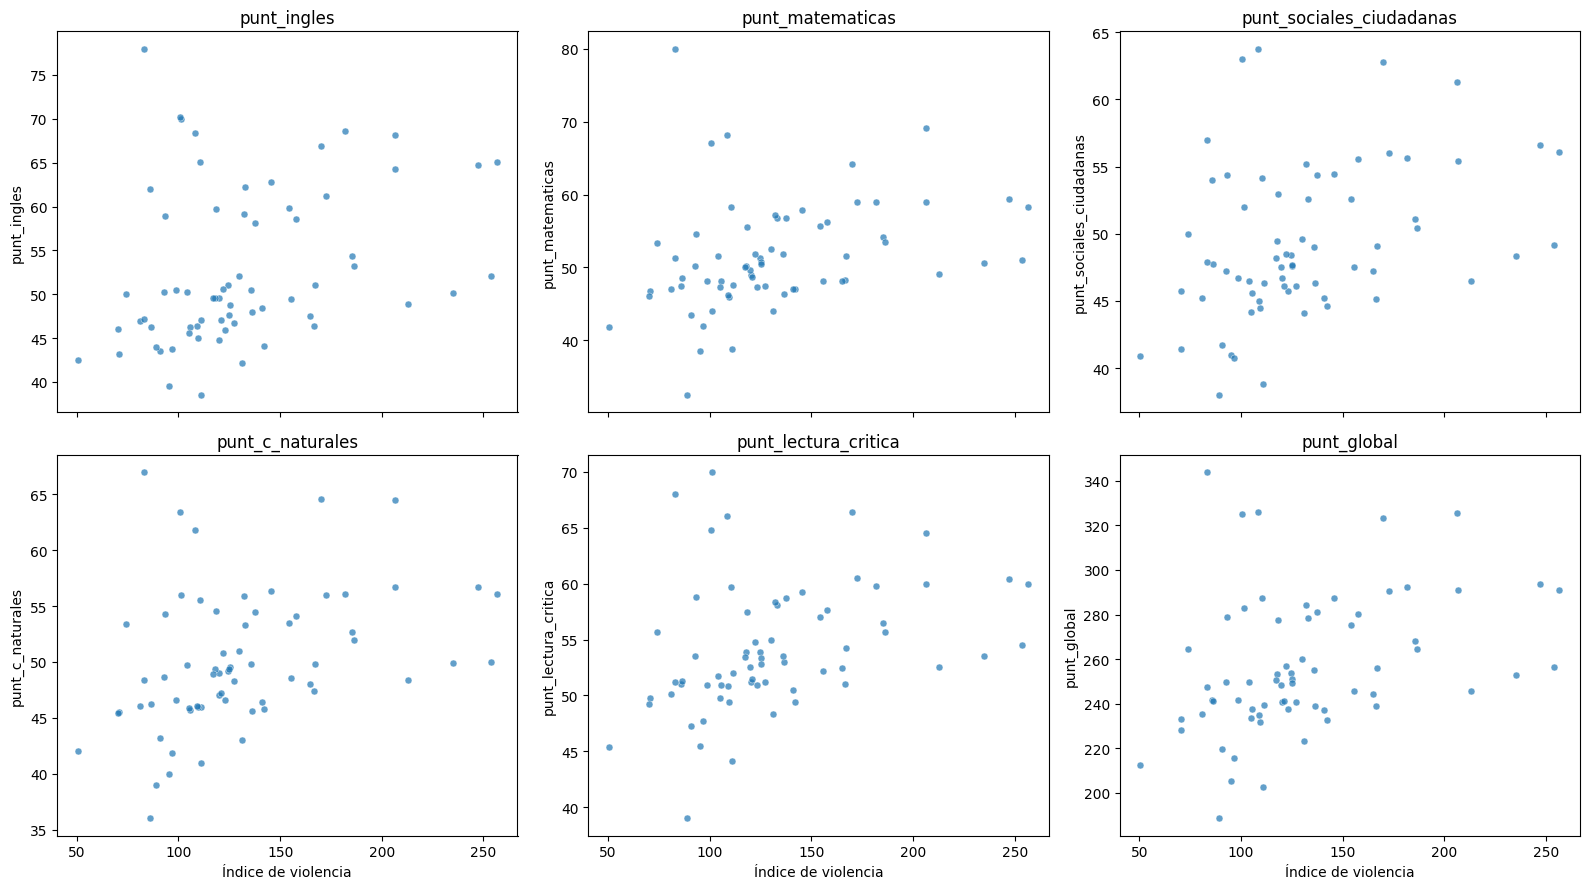

indice_violencia            1.000000
punt_sociales_ciudadanas    0.374981
punt_c_naturales            0.367628
punt_global                 0.358738
punt_lectura_critica        0.337827
punt_matematicas            0.318387
punt_ingles                 0.315185
año                        -0.030399
Name: indice_violencia, dtype: float64
[np.int64(2020), np.int64(2021), np.int64(2022)]


In [158]:
#print(categorias)
munivio_agg = (muni_vio
    .groupby(["cole_mcpio_ubicacion", "año"], as_index=False)
    .agg(
        indice_violencia=("indice_violencia", "first"),
        **{col: (col, "mean") for col in categorias}
    )
)

# scatterplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, categorias):
    sns.scatterplot(
        data=munivio_agg,
        x="indice_violencia",
        y=col,
        ax=ax,
        s=25,
        alpha=0.7
    )
    ax.set_title(col)
    ax.set_xlabel("Índice de violencia")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

print(munivio_agg.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))
print(sorted(munivio_agg["año"].unique()))


## Homicidios


C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\3551983194.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipos2020s["año"] = municipos2020s["año"].astype(int)


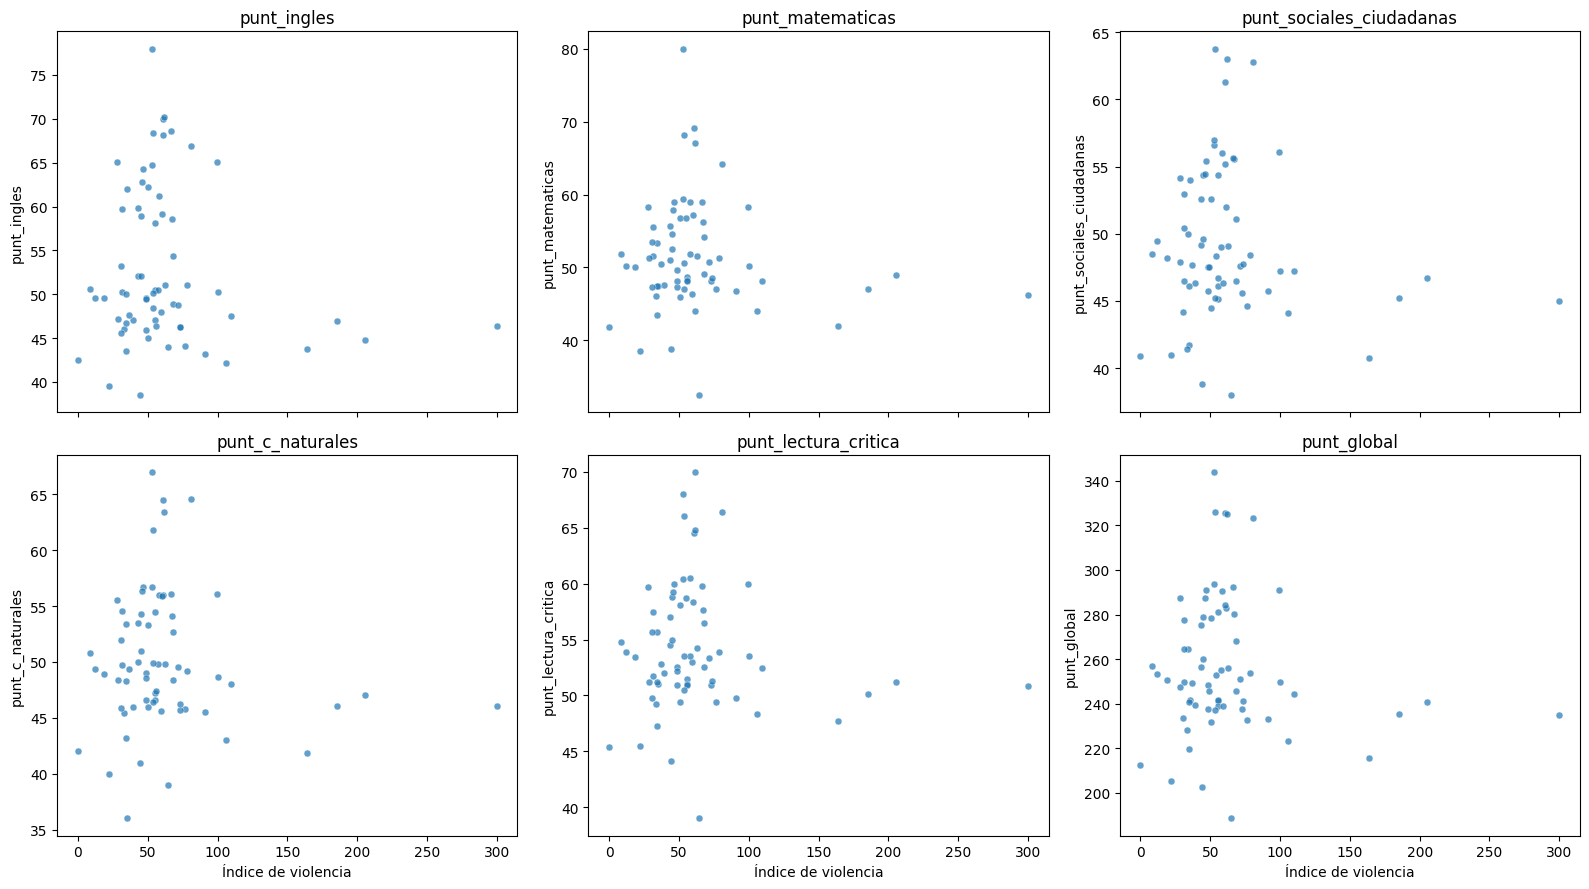

indice_violencia            1.000000
año                         0.157789
punt_lectura_critica       -0.083831
punt_c_naturales           -0.099184
punt_matematicas           -0.100416
punt_sociales_ciudadanas   -0.103695
punt_global                -0.104415
punt_ingles                -0.126150
Name: indice_violencia, dtype: float64


In [155]:
homicidios = pd.read_excel("Violencia Valle del Cauca Indices con Página con todo junto.xlsx", sheet_name="Homicidios")
homicidios.head()


indice_largo = homicidios.melt(
    id_vars="cole_mcpio_ubicacion",
    value_vars=[2020, 2021, 2022, 2023, 2024],
    var_name="año",
    value_name="indice_violencia"
)
indice_largo["año"] = indice_largo["año"].astype(int)
municipos2020s["año"] = municipos2020s["año"].astype(int)

muni_homicidios = municipos2020s.merge(
    indice_largo,
    on=["cole_mcpio_ubicacion", "año"],
    how="left"
)

#print(muni_vio)
#muni_vio.shape
#munihomicidios=muni_homicidios.groupby(["cole_mcpio_ubicacion"])
#munihomicidios.describe()

#print(munihomicidios.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))


#print(categorias)
munivio_agg = (muni_homicidios
    .groupby(["cole_mcpio_ubicacion", "año"], as_index=False)
    .agg(
        indice_violencia=("indice_violencia", "first"),
        **{col: (col, "mean") for col in categorias}
    )
)

# scatterplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, categorias):
    sns.scatterplot(
        data=munivio_agg,
        x="indice_violencia",
        y=col,
        ax=ax,
        s=25,
        alpha=0.7
    )
    ax.set_title(col)
    ax.set_xlabel("Índice de violencia")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

print(munivio_agg.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))



## Lesiones Personales

C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\1243637644.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipos2020s["año"] = municipos2020s["año"].astype(int)


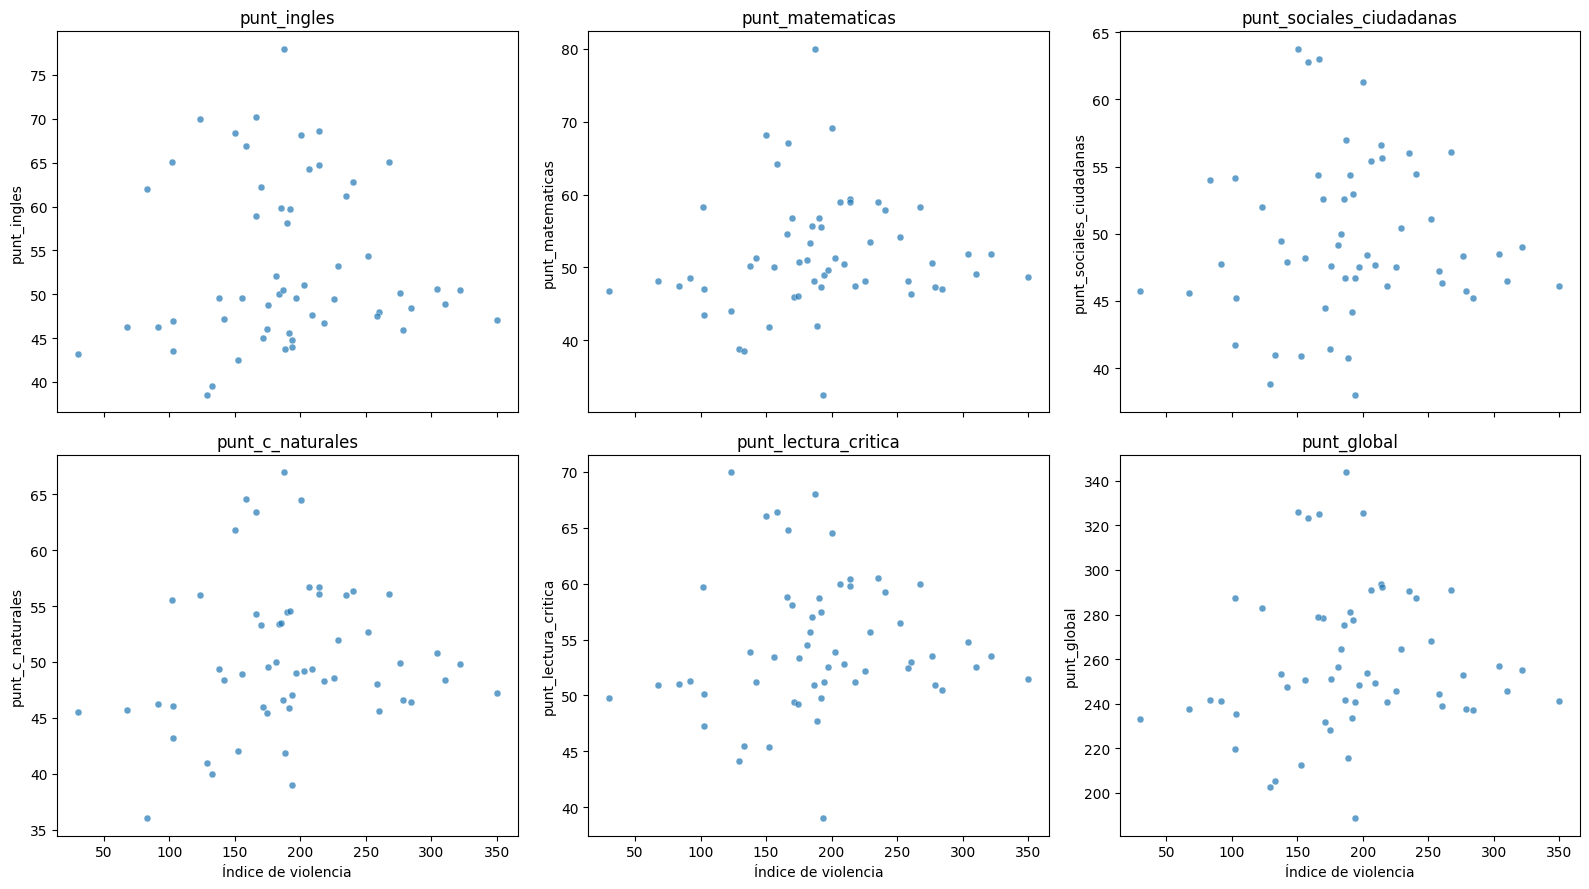

indice_violencia            1.000000
año                         0.165047
punt_c_naturales            0.146881
punt_matematicas            0.105591
punt_global                 0.086879
punt_lectura_critica        0.065661
punt_sociales_ciudadanas    0.034209
punt_ingles                 0.018510
Name: indice_violencia, dtype: float64


In [157]:
lesionesp = pd.read_excel("Violencia Valle del Cauca Indices con Página con todo junto.xlsx", sheet_name="Lesiones Personales")
lesionesp.head()


indice_largo = lesionesp.melt(
    id_vars="cole_mcpio_ubicacion",
    value_vars=[2020, 2021, 2022, 2023, 2024],
    var_name="año",
    value_name="indice_violencia"
)
indice_largo["año"] = indice_largo["año"].astype(int)
municipos2020s["año"] = municipos2020s["año"].astype(int)

muni_lesionesp = municipos2020s.merge(
    indice_largo,
    on=["cole_mcpio_ubicacion", "año"],
    how="left"
)

#print(muni_vio)
#muni_vio.shape
#munihomicidios=muni_homicidios.groupby(["cole_mcpio_ubicacion"])
#munihomicidios.describe()

#print(munihomicidios.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))


#print(categorias)
munivio_agg = (muni_lesionesp
    .groupby(["cole_mcpio_ubicacion", "año"], as_index=False)
    .agg(
        indice_violencia=("indice_violencia", "first"),
        **{col: (col, "mean") for col in categorias}
    )
)

# scatterplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, categorias):
    sns.scatterplot(
        data=munivio_agg,
        x="indice_violencia",
        y=col,
        ax=ax,
        s=25,
        alpha=0.7
    )
    ax.set_title(col)
    ax.set_xlabel("Índice de violencia")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

print(munivio_agg.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))

## Violencia Intrafamiliar

C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\1228927787.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipos2020s["año"] = municipos2020s["año"].astype(int)


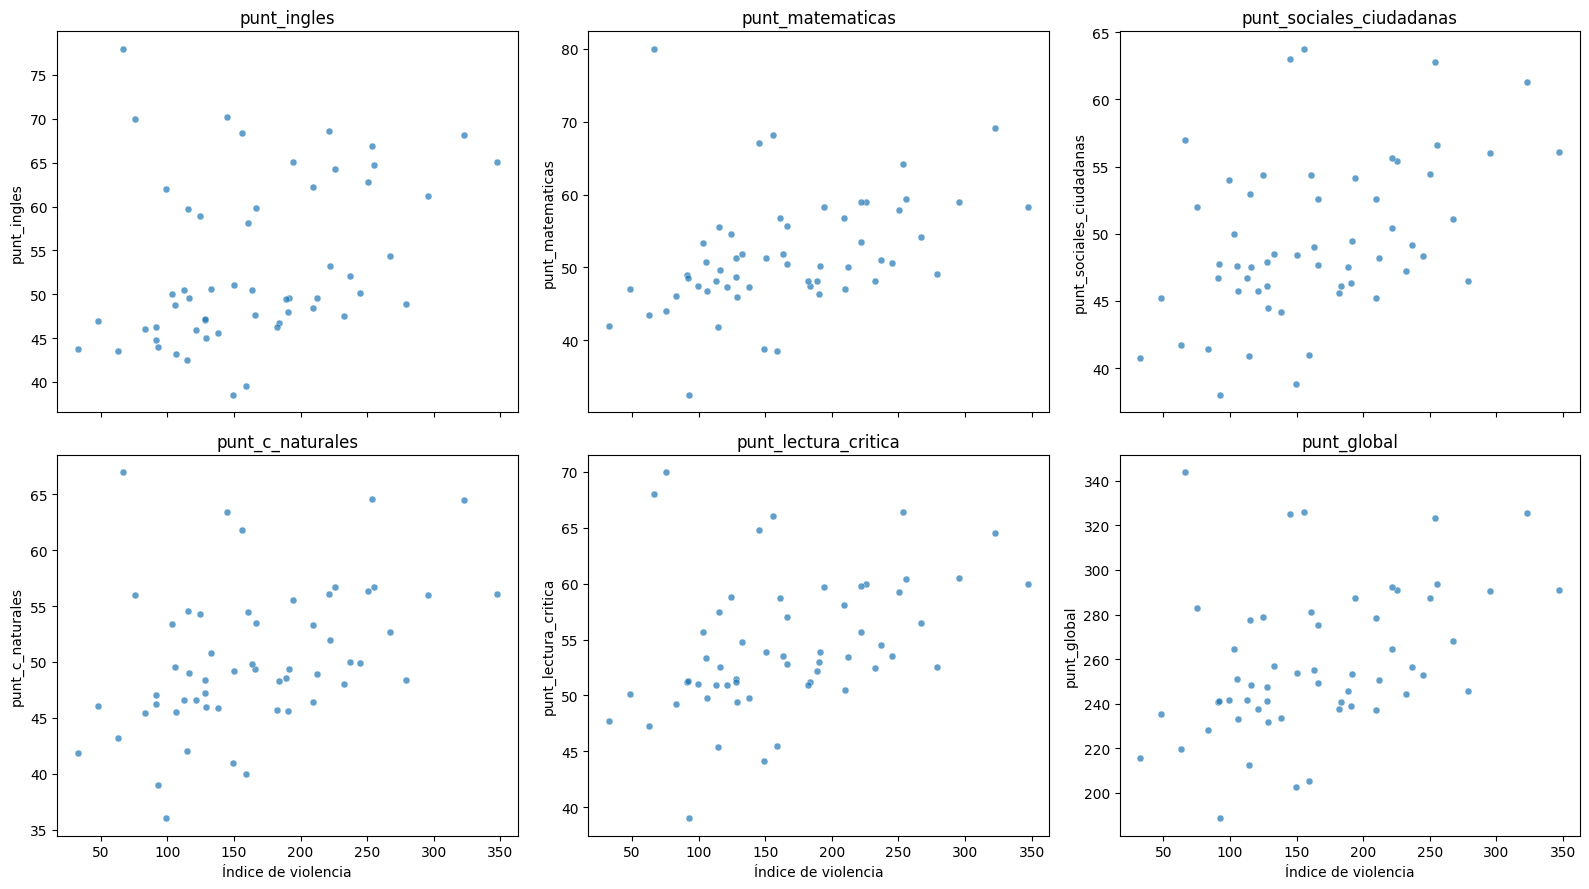

indice_violencia            1.000000
punt_sociales_ciudadanas    0.449030
punt_c_naturales            0.416046
punt_global                 0.409695
punt_matematicas            0.375579
punt_lectura_critica        0.362635
punt_ingles                 0.339843
año                        -0.103462
Name: indice_violencia, dtype: float64


In [159]:
violencia_int = pd.read_excel("Violencia Valle del Cauca Indices con Página con todo junto.xlsx", sheet_name="Violencia Intrafamiliar")
violencia_int.head()


indice_largo = violencia_int.melt(
    id_vars="cole_mcpio_ubicacion",
    value_vars=[2020, 2021, 2022, 2023, 2024],
    var_name="año",
    value_name="indice_violencia"
)
indice_largo["año"] = indice_largo["año"].astype(int)
municipos2020s["año"] = municipos2020s["año"].astype(int)

muni_violencia_int = municipos2020s.merge(
    indice_largo,
    on=["cole_mcpio_ubicacion", "año"],
    how="left"
)

#print(muni_vio)
#muni_vio.shape
#munihomicidios=muni_homicidios.groupby(["cole_mcpio_ubicacion"])
#munihomicidios.describe()

#print(munihomicidios.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))


#print(categorias)
munivio_agg = (muni_violencia_int
    .groupby(["cole_mcpio_ubicacion", "año"], as_index=False)
    .agg(
        indice_violencia=("indice_violencia", "first"),
        **{col: (col, "mean") for col in categorias}
    )
)

# scatterplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, categorias):
    sns.scatterplot(
        data=munivio_agg,
        x="indice_violencia",
        y=col,
        ax=ax,
        s=25,
        alpha=0.7
    )
    ax.set_title(col)
    ax.set_xlabel("Índice de violencia")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

print(munivio_agg.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))

## Delitos Sexuales

C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\2582597202.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipos2020s["año"] = municipos2020s["año"].astype(int)


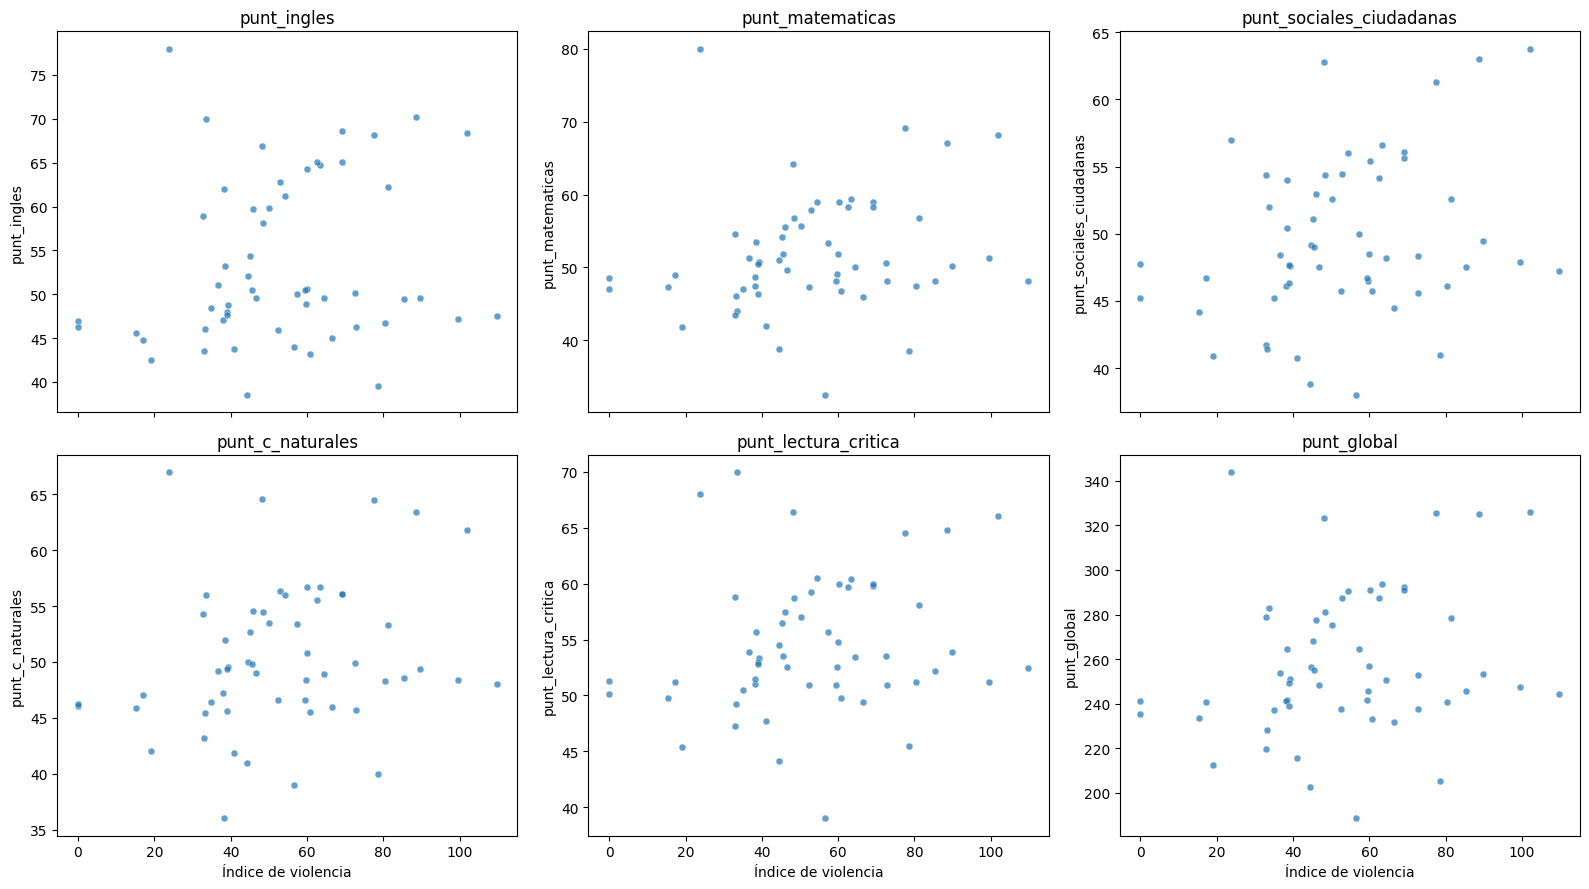

indice_violencia            1.000000
punt_sociales_ciudadanas    0.281605
punt_c_naturales            0.229956
punt_global                 0.225057
punt_matematicas            0.202759
punt_lectura_critica        0.175981
punt_ingles                 0.171157
año                        -0.118951
Name: indice_violencia, dtype: float64


In [160]:
delitos_sex = pd.read_excel("Violencia Valle del Cauca Indices con Página con todo junto.xlsx", sheet_name="Delitos Sexuales")
delitos_sex.head()


indice_largo = delitos_sex.melt(
    id_vars="cole_mcpio_ubicacion",
    value_vars=[2020, 2021, 2022, 2023, 2024],
    var_name="año",
    value_name="indice_violencia"
)
indice_largo["año"] = indice_largo["año"].astype(int)
municipos2020s["año"] = municipos2020s["año"].astype(int)

muni_delitos_sex = municipos2020s.merge(
    indice_largo,
    on=["cole_mcpio_ubicacion", "año"],
    how="left"
)

#print(muni_vio)
#muni_vio.shape
#munihomicidios=muni_homicidios.groupby(["cole_mcpio_ubicacion"])
#munihomicidios.describe()

#print(munihomicidios.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))


#print(categorias)
munivio_agg = (muni_delitos_sex
    .groupby(["cole_mcpio_ubicacion", "año"], as_index=False)
    .agg(
        indice_violencia=("indice_violencia", "first"),
        **{col: (col, "mean") for col in categorias}
    )
)

# scatterplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, categorias):
    sns.scatterplot(
        data=munivio_agg,
        x="indice_violencia",
        y=col,
        ax=ax,
        s=25,
        alpha=0.7
    )
    ax.set_title(col)
    ax.set_xlabel("Índice de violencia")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

print(munivio_agg.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))

## Extorsión

C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\4177956035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipos2020s["año"] = municipos2020s["año"].astype(int)


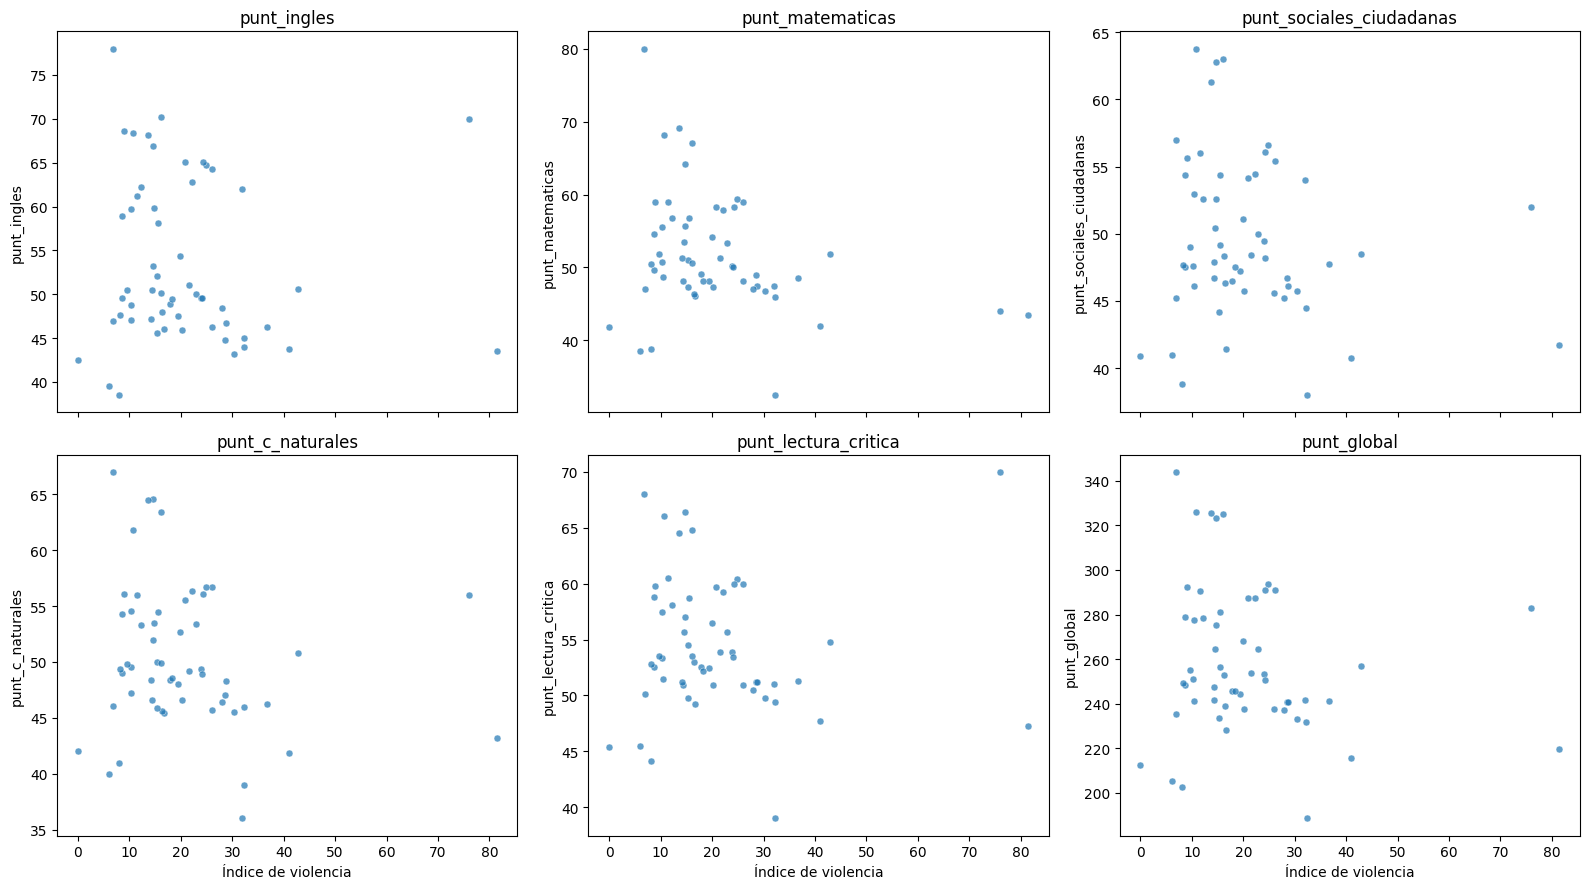

indice_violencia            1.000000
año                         0.146656
punt_lectura_critica       -0.031144
punt_ingles                -0.056529
punt_sociales_ciudadanas   -0.168023
punt_global                -0.172326
punt_c_naturales           -0.180088
punt_matematicas           -0.294623
Name: indice_violencia, dtype: float64


In [161]:
extorsion = pd.read_excel("Violencia Valle del Cauca Indices con Página con todo junto.xlsx", sheet_name="Extorsión")
extorsion.head()


indice_largo = extorsion.melt(
    id_vars="cole_mcpio_ubicacion",
    value_vars=[2020, 2021, 2022, 2023, 2024],
    var_name="año",
    value_name="indice_violencia"
)
indice_largo["año"] = indice_largo["año"].astype(int)
municipos2020s["año"] = municipos2020s["año"].astype(int)

muni_extorsion = municipos2020s.merge(
    indice_largo,
    on=["cole_mcpio_ubicacion", "año"],
    how="left"
)

#print(muni_vio)
#muni_vio.shape
#munihomicidios=muni_homicidios.groupby(["cole_mcpio_ubicacion"])
#munihomicidios.describe()

#print(munihomicidios.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))


#print(categorias)
munivio_agg = (muni_extorsion
    .groupby(["cole_mcpio_ubicacion", "año"], as_index=False)
    .agg(
        indice_violencia=("indice_violencia", "first"),
        **{col: (col, "mean") for col in categorias}
    )
)

# scatterplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, categorias):
    sns.scatterplot(
        data=munivio_agg,
        x="indice_violencia",
        y=col,
        ax=ax,
        s=25,
        alpha=0.7
    )
    ax.set_title(col)
    ax.set_xlabel("Índice de violencia")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

print(munivio_agg.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))

## Amenazas

C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\2092205673.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipos2020s["año"] = municipos2020s["año"].astype(int)


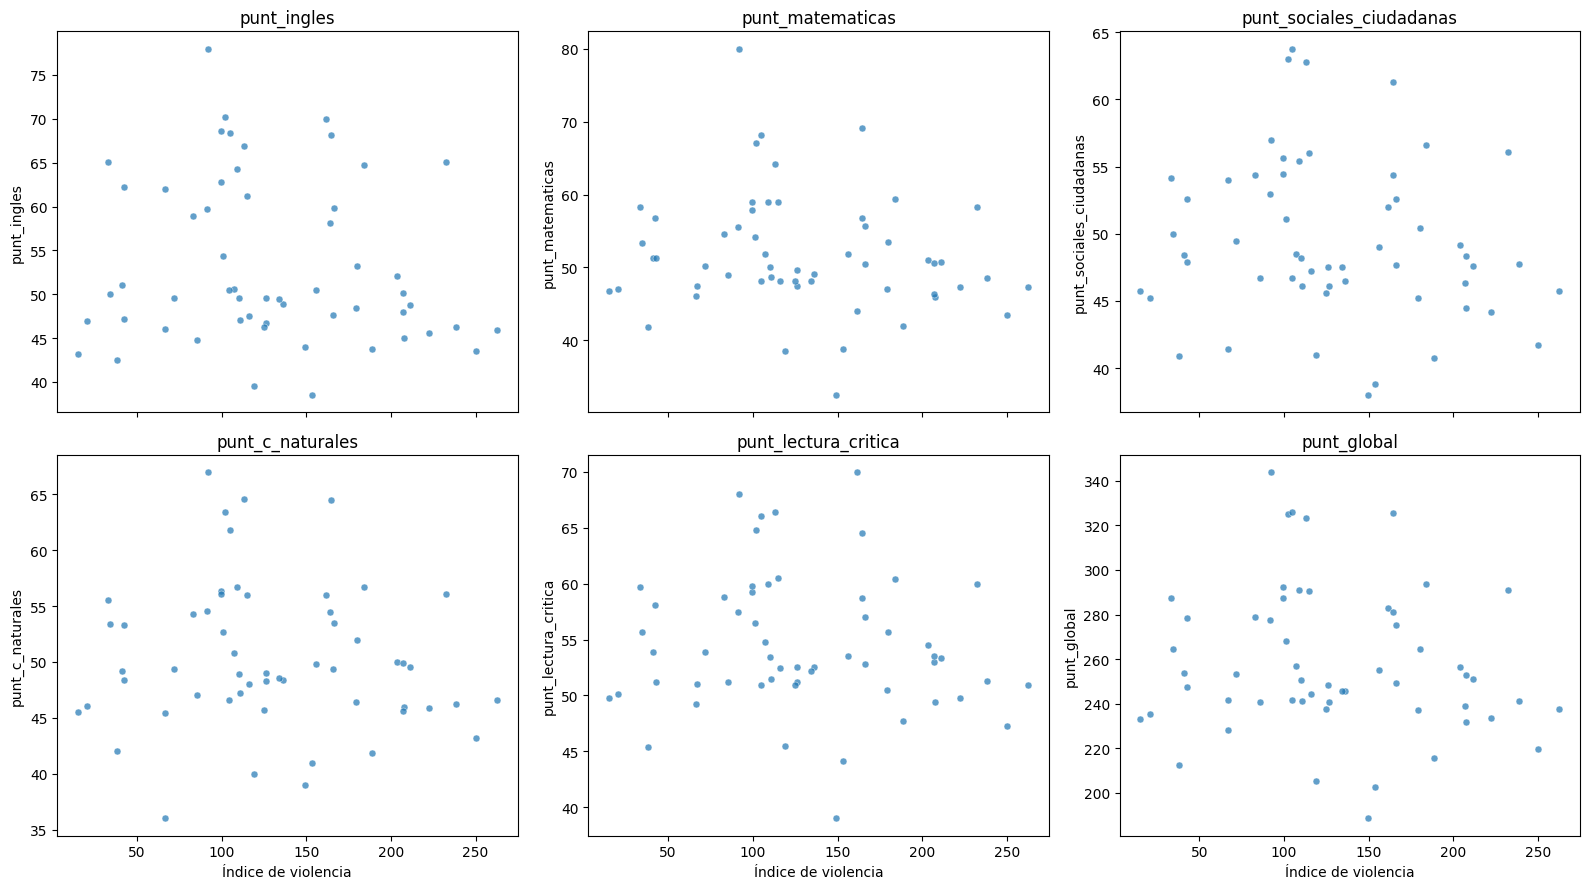

indice_violencia            1.000000
año                         0.196648
punt_lectura_critica       -0.090251
punt_c_naturales           -0.091952
punt_global                -0.126428
punt_ingles                -0.136328
punt_sociales_ciudadanas   -0.137933
punt_matematicas           -0.150717
Name: indice_violencia, dtype: float64


In [162]:
amenazas = pd.read_excel("Violencia Valle del Cauca Indices con Página con todo junto.xlsx", sheet_name="Amenazas")
amenazas.head()


indice_largo = amenazas.melt(
    id_vars="cole_mcpio_ubicacion",
    value_vars=[2020, 2021, 2022, 2023, 2024],
    var_name="año",
    value_name="indice_violencia"
)
indice_largo["año"] = indice_largo["año"].astype(int)
municipos2020s["año"] = municipos2020s["año"].astype(int)

muni_amenazas = municipos2020s.merge(
    indice_largo,
    on=["cole_mcpio_ubicacion", "año"],
    how="left"
)

#print(muni_vio)
#muni_vio.shape
#munihomicidios=muni_homicidios.groupby(["cole_mcpio_ubicacion"])
#munihomicidios.describe()

#print(munihomicidios.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))


#print(categorias)
munivio_agg = (muni_amenazas
    .groupby(["cole_mcpio_ubicacion", "año"], as_index=False)
    .agg(
        indice_violencia=("indice_violencia", "first"),
        **{col: (col, "mean") for col in categorias}
    )
)

# scatterplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, categorias):
    sns.scatterplot(
        data=munivio_agg,
        x="indice_violencia",
        y=col,
        ax=ax,
        s=25,
        alpha=0.7
    )
    ax.set_title(col)
    ax.set_xlabel("Índice de violencia")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

print(munivio_agg.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))

## Hurtos

C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\4144831165.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipos2020s["año"] = municipos2020s["año"].astype(int)


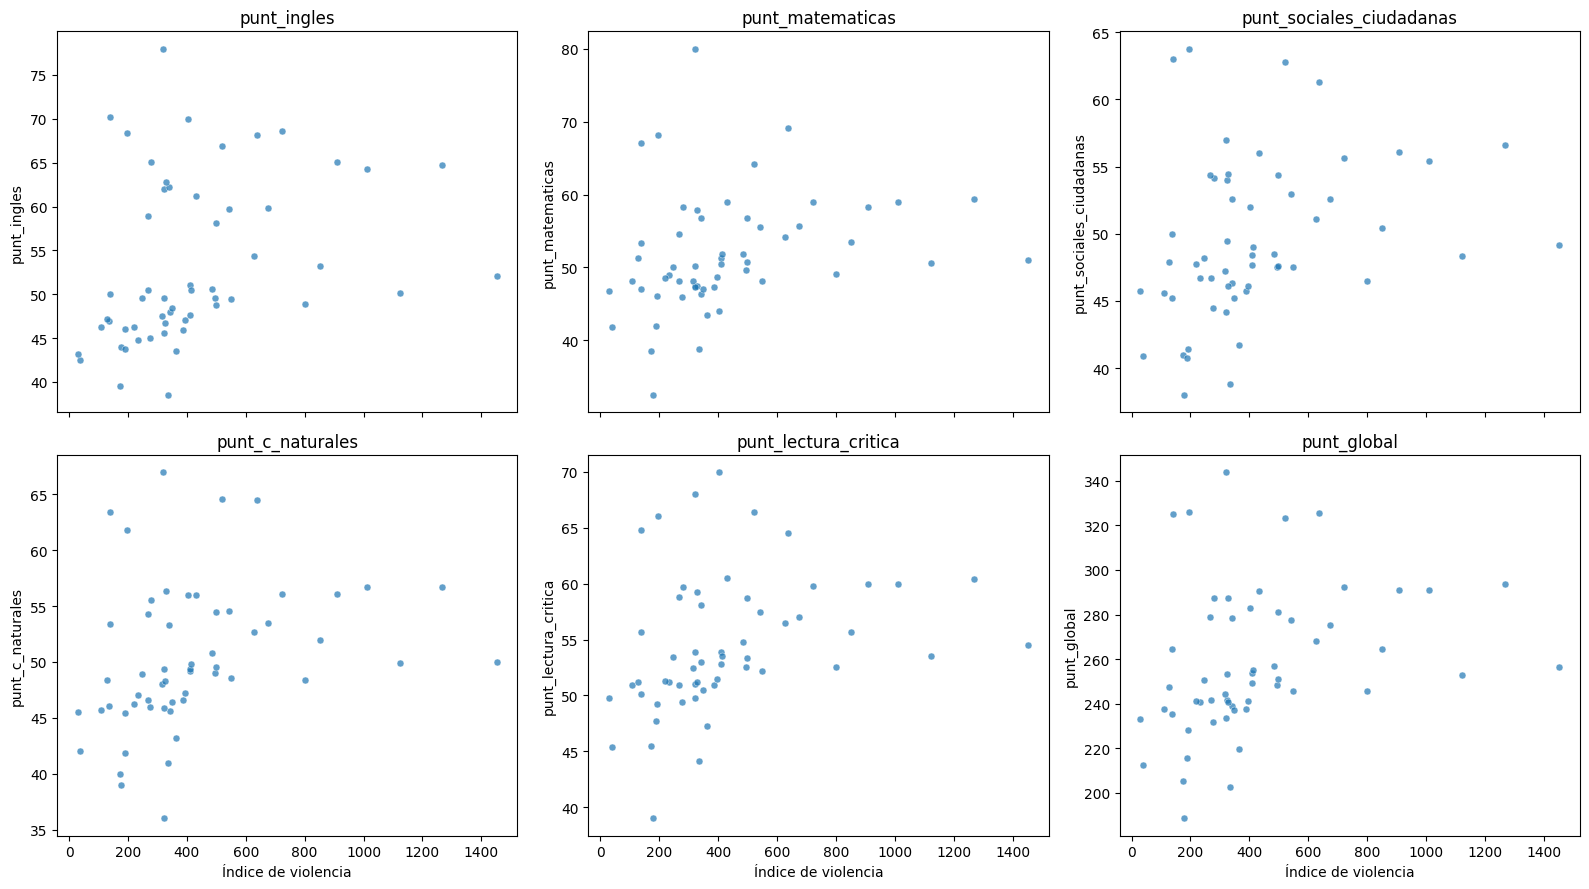

indice_violencia            1.000000
punt_ingles                 0.311247
punt_global                 0.308190
punt_c_naturales            0.307071
punt_sociales_ciudadanas    0.305267
punt_lectura_critica        0.304174
punt_matematicas            0.265584
año                        -0.026886
Name: indice_violencia, dtype: float64


In [163]:
hurtos = pd.read_excel("Violencia Valle del Cauca Indices con Página con todo junto.xlsx", sheet_name="Hurtos")
hurtos.head()


indice_largo = hurtos.melt(
    id_vars="cole_mcpio_ubicacion",
    value_vars=[2020, 2021, 2022, 2023, 2024],
    var_name="año",
    value_name="indice_violencia"
)
indice_largo["año"] = indice_largo["año"].astype(int)
municipos2020s["año"] = municipos2020s["año"].astype(int)

muni_hurtos = municipos2020s.merge(
    indice_largo,
    on=["cole_mcpio_ubicacion", "año"],
    how="left"
)

#print(muni_vio)
#muni_vio.shape
#munihomicidios=muni_homicidios.groupby(["cole_mcpio_ubicacion"])
#munihomicidios.describe()

#print(munihomicidios.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))


#print(categorias)
munivio_agg = (muni_hurtos
    .groupby(["cole_mcpio_ubicacion", "año"], as_index=False)
    .agg(
        indice_violencia=("indice_violencia", "first"),
        **{col: (col, "mean") for col in categorias}
    )
)

# scatterplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, categorias):
    sns.scatterplot(
        data=munivio_agg,
        x="indice_violencia",
        y=col,
        ax=ax,
        s=25,
        alpha=0.7
    )
    ax.set_title(col)
    ax.set_xlabel("Índice de violencia")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

print(munivio_agg.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))

## Secuestro

C:\Users\Juan Camilo Gómez\AppData\Local\Temp\ipykernel_20448\666456491.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipos2020s["año"] = municipos2020s["año"].astype(int)


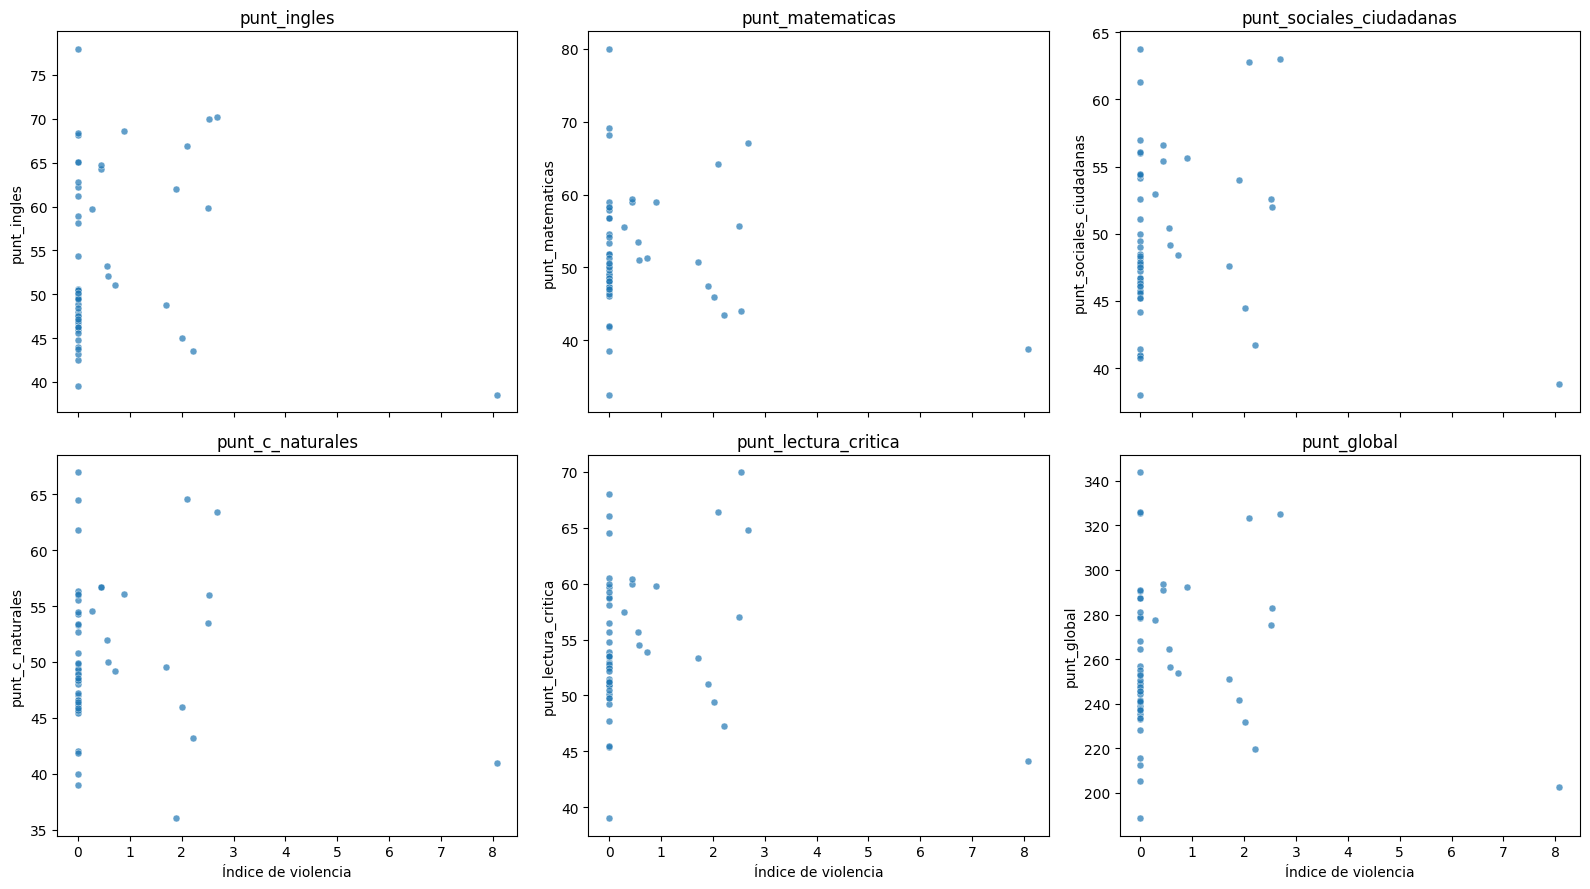

indice_violencia            1.000000
punt_ingles                 0.008259
punt_lectura_critica       -0.021550
punt_sociales_ciudadanas   -0.043542
punt_global                -0.063407
punt_c_naturales           -0.065340
punt_matematicas           -0.125788
año                        -0.177687
Name: indice_violencia, dtype: float64


In [164]:
secuestros = pd.read_excel("Violencia Valle del Cauca Indices con Página con todo junto.xlsx", sheet_name="Secuestro")
secuestros.head()


indice_largo = secuestros.melt(
    id_vars="cole_mcpio_ubicacion",
    value_vars=[2020, 2021, 2022, 2023, 2024],
    var_name="año",
    value_name="indice_violencia"
)
indice_largo["año"] = indice_largo["año"].astype(int)
municipos2020s["año"] = municipos2020s["año"].astype(int)

muni_secuestros = municipos2020s.merge(
    indice_largo,
    on=["cole_mcpio_ubicacion", "año"],
    how="left"
)

#print(muni_vio)
#muni_vio.shape
#munihomicidios=muni_homicidios.groupby(["cole_mcpio_ubicacion"])
#munihomicidios.describe()

#print(munihomicidios.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))


#print(categorias)
munivio_agg = (muni_secuestros
    .groupby(["cole_mcpio_ubicacion", "año"], as_index=False)
    .agg(
        indice_violencia=("indice_violencia", "first"),
        **{col: (col, "mean") for col in categorias}
    )
)

# scatterplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, categorias):
    sns.scatterplot(
        data=munivio_agg,
        x="indice_violencia",
        y=col,
        ax=ax,
        s=25,
        alpha=0.7
    )
    ax.set_title(col)
    ax.set_xlabel("Índice de violencia")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

print(munivio_agg.corr(numeric_only=True)["indice_violencia"].sort_values(ascending=False))